<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Bonifasius Erlangga Einsoni Rienko"
KELAS = "B"
NPM = "1906302850"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Bonifasius Erlangga Einsoni Rienko dari kelas B dengan NPM 1906302850, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Bonifasius Erlangga Einsoni Rienko)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [521]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [522]:
penguin_df = pd.read_csv("penguin.csv")
display(penguin_df)

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [523]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

CENTRAL TENDENCY

In [524]:
mode_pulau_habitat = penguin_df['pulau_habitat'].mode()
print("Berikut adalah mean dari dataset penguin kolom mode_pulau_habitat:")
print(mode_pulau_habitat)
print("\n")

mode_jenis_kelamin = penguin_df['jenis_kelamin'].mode()
print("Berikut adalah mean dari dataset penguin kolom jenis_kelamin:")
print(mode_jenis_kelamin)
print("\n")

print("Kedua kolom di atas saya menampilkan informasi sebagai central tendency karena bersifat kategorikal")

Berikut adalah mean dari dataset penguin kolom mode_pulau_habitat:
0    Biscoe
dtype: object


Berikut adalah mean dari dataset penguin kolom jenis_kelamin:
0    MALE
dtype: object


Kedua kolom di atas saya menampilkan informasi sebagai central tendency karena bersifat kategorikal


SKEWNESS

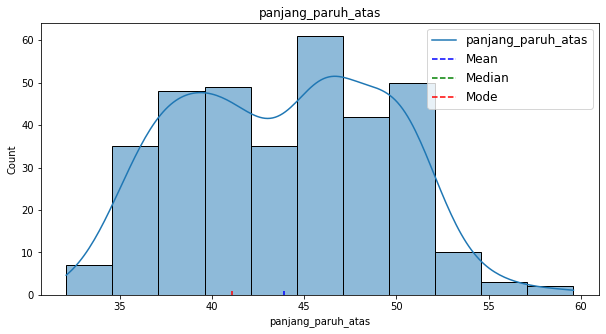

None


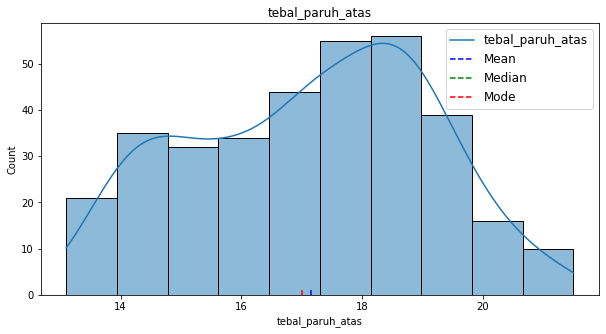

None


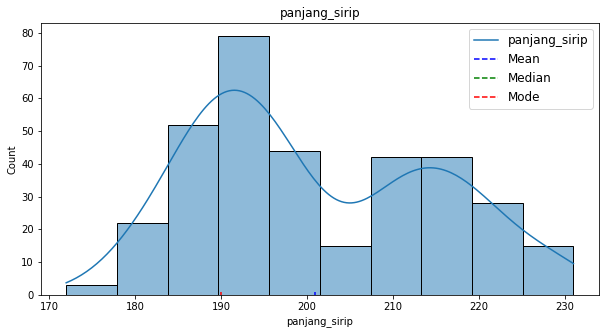

None


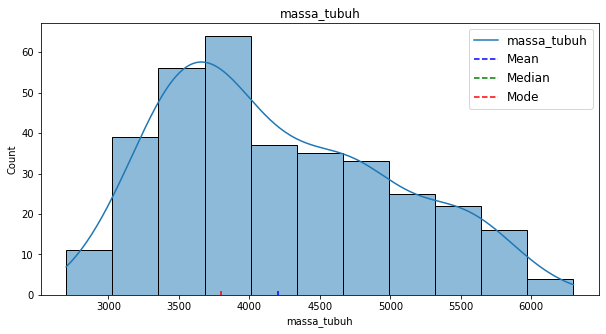

None


In [525]:
import scipy.stats as scp
from scipy.stats import skew

panjang_paruh = penguin_df['panjang_paruh_atas']
tebal_paruh = penguin_df['tebal_paruh_atas']
panjang_sirip = penguin_df['panjang_sirip']
massa_tubuh = penguin_df['massa_tubuh']

def figure(data, column):
  plt.figure(figsize=(10,5))
  sns.histplot(data=data, x=column, kde=True)
  plt.title(column)
  plt.vlines(x=np.mean(data[column]), ymin=0, ymax=1, color='blue', linestyle='--')
  plt.vlines(x=np.median(data[column]), ymin=0, ymax=1, color='green', linestyle='--')
  plt.vlines(x=scp.mode(data[column])[0][0], ymin=0, ymax=1, color='red', linestyle='--')
  plt.legend([column, 'Mean', 'Median', 'Mode'], fontsize=12)
  plt.show()

print(figure(penguin_df, 'panjang_paruh_atas'))
print(figure(penguin_df, 'tebal_paruh_atas'))
print(figure(penguin_df, 'panjang_sirip'))
print(figure(penguin_df, 'massa_tubuh'))

Jika kita lihat disini, maka dapat kita lihat bahwa kolom panjang_paruh_atas memiliki double skewness, kolom tebal_paruh_atas cenderung memiliki negative skewed, kolom panjang_sirip cenderung memiliki positive skewed, dan kolom massa_tubuh memiliki poitive skewed. Jika memiliki distribusi data yang tidak terdistribusi normal, maka saya akan menetapkan central tendency untuk keempat kolom ini adalah median

CORRELATION

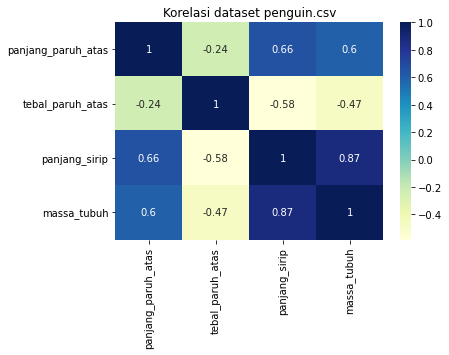

In [526]:
dataplot = sns.heatmap(penguin_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Korelasi dataset penguin.csv")
plt.show()

In [527]:
import statistics

def measure_of_variation(data):
    q1 = data.quantile(q = 0.25)
    q2 = data.quantile(q = 0.50)
    q3 = data.quantile(q = 0.75)
    iqr = q3 - q1
    print("iqr sebesar " + str(iqr))
    range = max(data)-min(data)
    print("Range sebesar "+str(range))
    stdev = statistics.stdev(data)
    print("standard deviasi dataset saat ini adalah "+str(stdev))
    var = stdev**2
    print("variansi dataset saat ini adalah "+str(var))

In [528]:
print("kolom panjang paruh")
print(measure_of_variation(panjang_paruh))
print("\n")

print("kolom tebal paruh")
print(measure_of_variation(tebal_paruh))
print("\n")

print("kolom panjang sirip")
print(measure_of_variation(panjang_sirip))
print("\n")

print("kolom massa tubuh")
print(measure_of_variation(massa_tubuh))

kolom panjang paruh
iqr sebesar 9.274999999999999
Range sebesar 27.5
standard deviasi dataset saat ini adalah nan
variansi dataset saat ini adalah nan
None


kolom tebal paruh
iqr sebesar 3.0999999999999996
Range sebesar 8.4
standard deviasi dataset saat ini adalah nan
variansi dataset saat ini adalah nan
None


kolom panjang sirip
iqr sebesar 23.0
Range sebesar 59.0
standard deviasi dataset saat ini adalah nan
variansi dataset saat ini adalah nan
None


kolom massa tubuh
iqr sebesar 1200.0
Range sebesar 3600.0
standard deviasi dataset saat ini adalah nan
variansi dataset saat ini adalah nan
None


4. Lakukan penanganan terhadap *missing values* [2]

In [529]:
# Cek missing value
def cek_null(df):
    col_na = df.isna().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [530]:
cek_null(penguin_df)

                    Total   Percent
jenis_kelamin          10  0.029070
panjang_paruh_atas      2  0.005814
tebal_paruh_atas        2  0.005814
panjang_sirip           2  0.005814
massa_tubuh             2  0.005814


In [531]:
# ingin memastikan kolom pulau_habitat tidak ada null
penguin_df["pulau_habitat"].isna().sum()

0

In [532]:
penguin_df = penguin_df.dropna()

In [533]:
penguin_df.isna().sum().sum()

0

Disini sudah tidak ada missing value

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

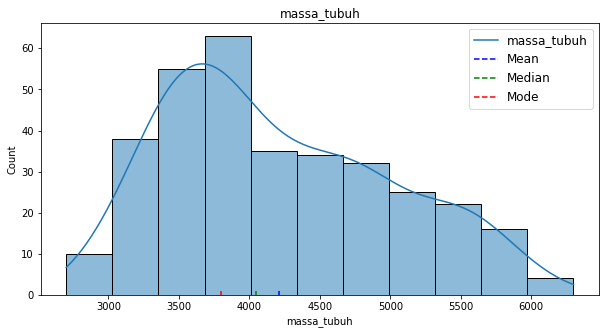

None


In [534]:
print(figure(penguin_df, 'massa_tubuh'))

untuk dataset dari penguin.csv (yang sudah ditangani missing valuenya), memiliki distribusi data positive skew dan tidak terdistribusi secara normal

In [535]:
penguin_df['jenis_kelamin'].value_counts()

MALE      168
FEMALE    165
.           1
Name: jenis_kelamin, dtype: int64

In [536]:
penguin_df.drop(penguin_df.index[penguin_df['jenis_kelamin'] == '.'], inplace=True)

In [537]:
penguin_df['jenis_kelamin'].value_counts()

MALE      168
FEMALE    165
Name: jenis_kelamin, dtype: int64

In [538]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
penguin_df['jenis_kelamin_angka'] = labelencoder.fit_transform(penguin_df['jenis_kelamin'])
display(penguin_df)

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin,jenis_kelamin_angka
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


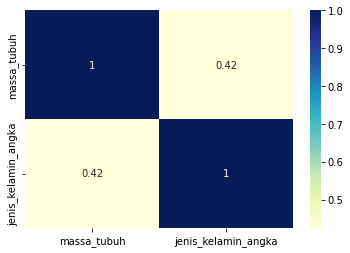

In [539]:
dataplot = sns.heatmap(penguin_df[['massa_tubuh','jenis_kelamin_angka']].corr(), cmap="YlGnBu", annot=True)

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

Saya akan melakukan pengelompokkan terhadap penguin dengan berdasarkan fitur tebal paruh atasnya dan panjang siripnya (hanya menerapkan 1 fitur saja, tidak. Alasan pertama saya memilih 2 fitur ini karena sifatnya tidak seperti atribut pada jenis_kelamin dan pulau_habitat yang cukup jelas. Karena menurut saya untuk pengelompokkan yang sudah jelas dari awal (seperti jenis_kelamin dan pulau_habitat) bukan termasuk clustering namun classification. Kemudian, alasan saya memilih spesifik fiturnya yaitu tebal_paruh_atas dan panjang_sirip karena ketika saya coba melakukan clustering (2 fitur) lainnya, nilai silhouette tertingginya tidak setinggi nilai silhouette tertinggi dari clustering fitur tebal_paruh_atas dan panjang_sirip. Saya melihat dari silhouette score karena menurut saya silhouette score dapat digunakan untuk melihat seberapa bagus suatu cluster ter-clustering (pengelompokkannya terlihat jelas)

**NOTE**: di bawah ini saya hanya menampilkan cluster terbaiknya saja dari hasil eksperimen karena menurut saya terlalu panjang atau banyak bila harus dilakukan atau ditampilkan satu-satu

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [540]:
display(penguin_df)

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin,jenis_kelamin_angka
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [541]:
penguin_df['pulau_habitat_angka'] = labelencoder.fit_transform(penguin_df['pulau_habitat'])
penguin_df


,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin,jenis_kelamin_angka,pulau_habitat_angka
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,2
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,2
...,...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0,0
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0,0
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,1,0
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,0


In [542]:
cluster_penguin = penguin_df.copy()
cluster_penguin1 = cluster_penguin[["panjang_sirip", "massa_tubuh"]]
cluster_penguin2 = cluster_penguin[["panjang_sirip", "tebal_paruh_atas"]]
cluster_penguin3 = cluster_penguin[["panjang_sirip", "panjang_paruh_atas"]]
cluster_penguin4 = cluster_penguin[["tebal_paruh_atas", "panjang_paruh_atas"]]
cluster_penguin5 = cluster_penguin[["tebal_paruh_atas", "massa_tubuh"]]
cluster_penguin6 = cluster_penguin[["massa_tubuh", "panjang_paruh_atas"]]
cluster_penguin7 = cluster_penguin[["panjang_sirip", "pulau_habitat_angka"]]
cluster_penguin8 = cluster_penguin[["panjang_sirip", "jenis_kelamin_angka"]]
cluster_penguin9 = cluster_penguin[["tebal_paruh_atas", "pulau_habitat_angka"]]
cluster_penguin10 = cluster_penguin[["tebal_paruh_atas", "jenis_kelamin_angka"]]
cluster_penguin11 = cluster_penguin[["massa_tubuh", "pulau_habitat_angka"]]
cluster_penguin12 = cluster_penguin[["massa_tubuh", "jenis_kelamin_angka"]]
cluster_penguin13 = cluster_penguin[["pulau_habitat_angka", "jenis_kelamin_angka"]]

In [543]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

cluster_penguin_std = StandardScaler().fit_transform(cluster_penguin2) #melakukan standarisasi
# di atas, saya sudah mencoba keenam cluster yang sudah saya buat, namun saya memilih cluster_penguin2 karena nilai silhouette tertingginya paling tinggi
# (lanjutan) dibandingkan cluster_penguin lainnya
pca = PCA(n_components=2) #membuat menjadi 2 dimensi, dan secara otomatis yang diambil adalah yang terkuat
principalComponents = pca.fit_transform(cluster_penguin_std)

In [544]:
# Melakukan normalisasi data
sc = StandardScaler()
X_scaled = sc.fit_transform(cluster_penguin_std)

In [545]:
from sklearn.decomposition import PCA

sklearn_pca = pca.fit_transform(X_scaled)
sklearn_pca.shape

(333, 2)

In [546]:
# buat menjadi dataframe baru
sklearn_pca = pd.DataFrame(sklearn_pca,columns=["pca1","pca2"])
sklearn_pca

,pca1,pca2
0,-1.560927,-0.456805
1,-0.840791,-0.671673
2,-0.601820,-0.001162
3,-1.170376,0.365286
4,-1.789459,0.681209
...,...,...
328,1.904542,-0.587508
329,1.739298,-0.321211
330,1.589521,0.535940
331,1.407909,-0.292983


In [547]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# https://realpython.com/k-means-clustering-python/
# https://stackoverflow.com/questions/69786897/how-to-calculate-silhoutte-score-for-the-data-in-excel-sheet-which-are-2000-loca

for i in range(2,7):
  K_Means = KMeans(n_clusters=i).fit(sklearn_pca)
  K_Means.fit_predict(sklearn_pca)
  score = silhouette_score(sklearn_pca, K_Means.labels_, metric='euclidean')
  print("Silhouette Score ke dengan cluster sebanyak",i,":",score)

Silhouette Score ke dengan cluster sebanyak 2 : 0.6411444745453794
Silhouette Score ke dengan cluster sebanyak 3 : 0.5008876222881513
Silhouette Score ke dengan cluster sebanyak 4 : 0.4329080143643537
Silhouette Score ke dengan cluster sebanyak 5 : 0.3972806723168208
Silhouette Score ke dengan cluster sebanyak 6 : 0.40116861359170414


Jika kita lihat dari silhouette score ini maka yang terbaik adalah kita membaginya menjadi 2 cluster. Alasannya karena Silhouette Scorenya paling tinggi ketika clusternya ada sebanyak 2

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [548]:
K_Means = KMeans(n_clusters=2).fit(principalComponents)

9. Visualisasikan klaster yang ada [5]

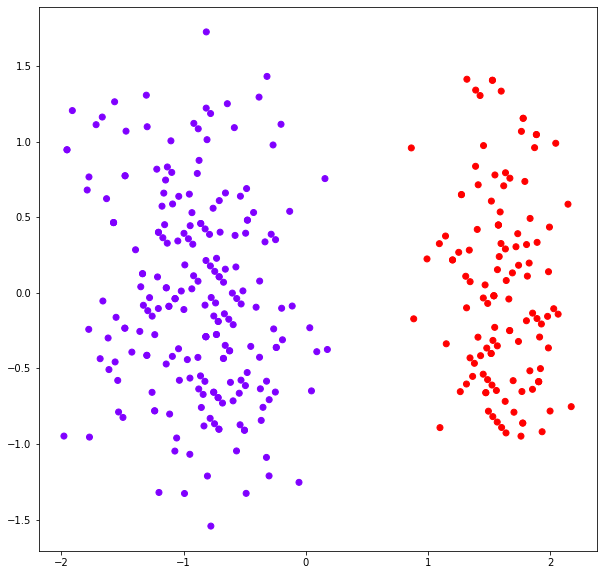

In [549]:
plt.figure(figsize=(10,10))
plt.scatter(sklearn_pca["pca1"], sklearn_pca["pca2"], c=K_Means.labels_, cmap='rainbow')

In [550]:
K_Means.cluster_centers_

array([[-0.89067435, -0.02349645],
       [ 1.60171689,  0.04225411]])

Di atas ini merupakan tempat centroid dari KMeans Clustering

10. Berikan interpretasi dari klaster yang dihasilkan [5]

Kalau dilihat dari sini, pembagian fitur berdasarkan panjang paruh atas dan panjang sirip terhadap penguin terlihat sangat jelas pembagiannya. Dari interpretasi tersebut, terlihat bahwa dihasilkan 2 jenis penguin apabila kita ingin membagi penguin berdasarkan panjang sirip dan tebal paruh atasnya

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [551]:
for i in range(2,7):
  ac = AgglomerativeClustering(n_clusters=i).fit(sklearn_pca)
  ac.fit_predict(sklearn_pca)
  score = silhouette_score(sklearn_pca, ac.labels_, metric='euclidean')
  print("Silhouette Score ke dengan cluster sebanyak",i,":",score)

Silhouette Score ke dengan cluster sebanyak 2 : 0.6411444745453794
Silhouette Score ke dengan cluster sebanyak 3 : 0.4857863848252908
Silhouette Score ke dengan cluster sebanyak 4 : 0.41608076615343886
Silhouette Score ke dengan cluster sebanyak 5 : 0.37040142594778735
Silhouette Score ke dengan cluster sebanyak 6 : 0.37798217203660706


12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

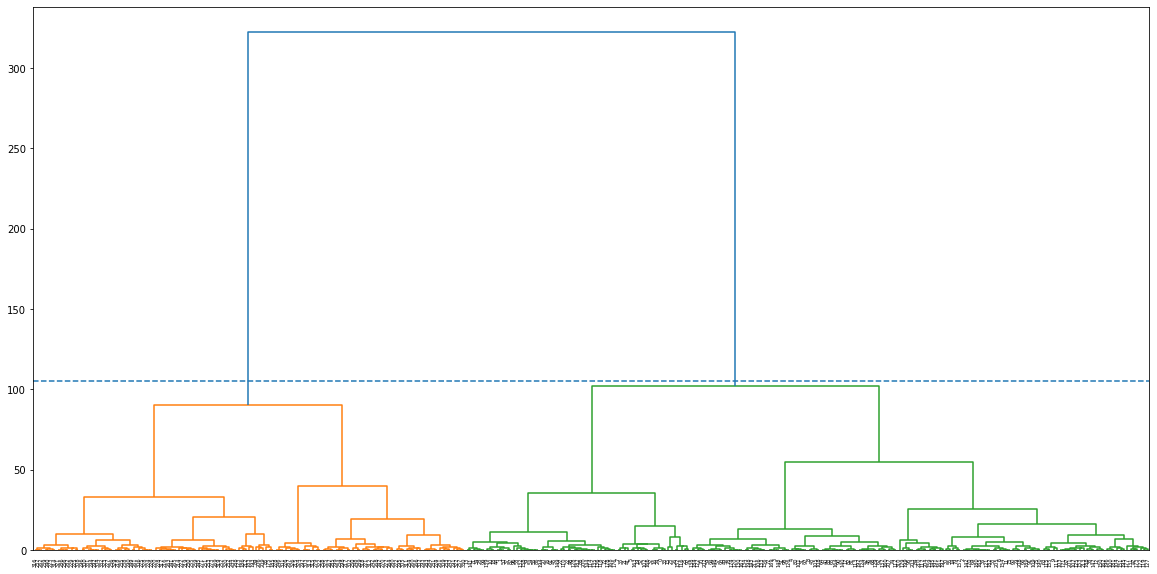

In [552]:
import scipy.cluster.hierarchy as sch
# menggunakan dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_penguin2, method  = "ward"))
plt.axhline(linestyle='--', y=105) 

Jika dilihat pada clustering ini, walaupun menggunakan metode yang berbeda dalam teknik clusteringnya, n_clusters optimalnya tetap sama, yaitu 2 cluster. Saya dapat menentukan bahwa jumlah optimalnya 2 dari silhouette score tertinggi ketika melakukan agglomerative clustering. Namun jika ingin dilihat dari dendrogram,saya memasang threshold di atas 2 cluster pada data (yang berwarna kuning dan hijau), alasannya karena perbedaan dari 2 stage tersebut tidak terlalu jauh (yang kuning dengan yang hijau), jadi sepertinya tidak perlu dicutting jadi 4 atau 3. Atau bahkan, jika saya ingin memotong benar-benar berdasarkan jarak di setiap cluster, saya bisa memasang thresholdnya diatas 300 (di tempatnya garis yang paling atas)

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [553]:
ac2 = AgglomerativeClustering(n_clusters = 2).fit(sklearn_pca)
ac2 = ac2.fit_predict(sklearn_pca)

14. Visualisasikan hasil *clustering assignment* [4]

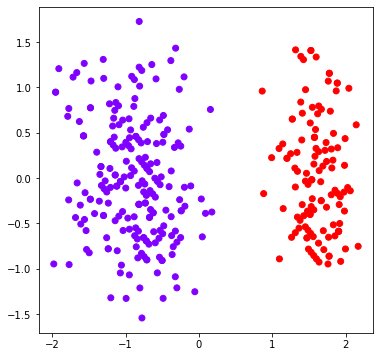

In [554]:
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(sklearn_pca['pca1'], sklearn_pca['pca2'],
           c = ac2, cmap ='rainbow')
plt.show()

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]

15. penanganan yang dapat dilakukan adalah dengan melakukan labeling encoding atau one-hot encoding. Labeling encoding adalah suatu teknik penanganan yang mensubtitusikan suatu nilai dari atribut tersebut menjadi data numerik, kalau one-hot encoding adalah suatu teknik penanganan yang membagi nilai categorical tersebut menjadi kolom sendiri, lalu nilainya diisi dengan 1 atau 0 (1 artinya bila nilainya adalah kolom tersebut, 0 artinya kalau nilainya bukan dari kolom tersebut)

16. Menurut saya, kurang cocok apabila diterapkan pada data yang tidak globular karena pada dasarnya k-means itu menghitung jarak dari centroid ke data yang terdekat kemudian dikumpulkan menjadi klaster. Apabila tidak globular, maka penempatan dan penghitungan centroid ke datanya menjadi aneh

17. Menurut saya mungkin sama, alasannya karena method KMeans dalam menetapkan centroidnya langsung ke yang menurut KMeans posisinya paling optimal

18. Secara umum, intra-cluster similarity menghitung suatu cluster pada data berdasarkan tingkat kemiripannya, sedangkan inter-cluster dissimilarity menghitung perbedaan suatu cluster dengan cluster lainnya itu seberapa bedanya. Menurut saya, cara tersebut akan membuat suatu klaster menjadi semakin baik karena nantinya akan menghasilkan beberapa klaster dengan perbedaan sifat di tiap klasternya, dan data di setiap klasternya (data-data di klaster yang sama) memiliki kemiripan yang cukup baik. Kedua hal tersebut akan membuat pengelompokkan pada clustering terlihat semakin jelas